# Astrocyte analysis

In [23]:
%%capture
!pip install tmd wget neurom[plotly]

In [24]:
import os
import wget
import tmd

import neurom as nm
import ipywidgets as widgets

from neurom.view import matplotlib_impl

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [26]:
astrocyte_base_url = "https://bbp.epfl.ch/ngv-portal/data/anatomy/reconstruction-data/synthesized-astrocyte-morphologies"
astrocyte_filenames = ["GLIA_0000000000100.h5", "GLIA_0000000000400.h5", "GLIA_0000000001200.h5", "GLIA_0000000001500.h5", "GLIA_0000000002350.h5", "GLIA_0000000003100.h5", "GLIA_0000000003400.h5", "GLIA_0000000004200.h5", "GLIA_0000000004500.h5", "GLIA_0000000000200.h5", "GLIA_0000000000500.h5", "GLIA_0000000001350.h5", "GLIA_0000000002100.h5", "GLIA_0000000002400.h5", "GLIA_0000000003250.h5", "GLIA_0000000003500.h5", "GLIA_0000000004300.h5", "GLIA_0000000000300.h5", "GLIA_0000000001100.h5", "GLIA_0000000001400.h5", "GLIA_0000000002250.h5", "GLIA_0000000002500.h5", "GLIA_0000000003350.h5", "GLIA_0000000004100.h5", "GLIA_0000000004400.h5"]

In [27]:
astrocyte_select = widgets.Select(
    options=astrocyte_filenames,
    value=astrocyte_filenames[0],
    rows=10,
    description='Astrocyte:',
    disabled=False
)
display(astrocyte_select)

Select(description='Astrocyte:', options=('GLIA_0000000000100.h5', 'GLIA_0000000000400.h5', 'GLIA_000000000120…

In [28]:
astrocyte_path = astrocyte_select.value
astrocyte_url = f'{astrocyte_base_url}/{astrocyte_path}'
wget.download(astrocyte_url, os.getcwd())

astrocyte = nm.load_morphology(astrocyte_path)

## Show the astrocyte

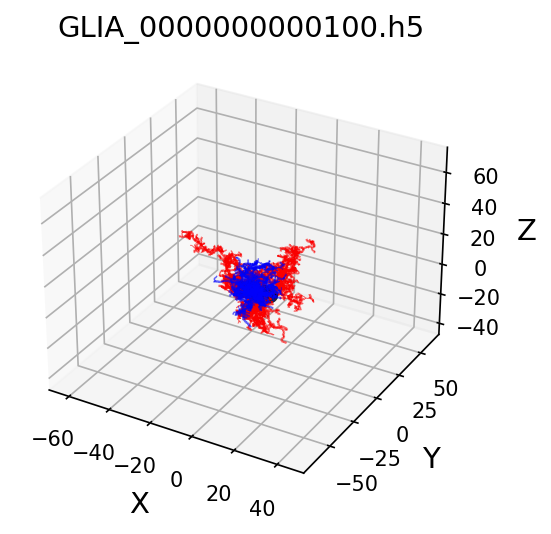

In [29]:
matplotlib_impl.plot_morph3d(astrocyte)

## Morphology Analysis

In [30]:
# Extract the total number of neurites (basal and apical dendrites, and axons)
number_of_neurites = nm.get('number_of_neurites', astrocyte)

# Extract the total number of sections
number_of_sections = nm.get('number_of_sections', astrocyte)

# Extract the soma radius
soma_radius = astrocyte.soma.radius

# Extract the number of sections per neurite
number_of_sections_per_neurite = nm.get('number_of_sections_per_neurite', astrocyte)

# Print result
print("Neuron id          : {0} \n\
Number of neurites : {1} \n\
Soma radius        : {2:.2f} \n\
Number of sections : {3}".format(astrocyte.name, number_of_neurites, soma_radius, number_of_sections))
print()
print("Neurite type \t\t\t| Number of sections")
for i, neurite in enumerate(astrocyte.neurites):    
    print("{0:31} | {1}".format(str(neurite.type), number_of_sections_per_neurite[i]))

Neuron id          : GLIA_0000000000100.h5 
Number of neurites : 10 
Soma radius        : 4.93 
Number of sections : 4600

Neurite type 			| Number of sections
NeuriteType.axon                | 67
NeuriteType.axon                | 67
NeuriteType.axon                | 1325
NeuriteType.basal_dendrite      | 299
NeuriteType.basal_dendrite      | 575
NeuriteType.basal_dendrite      | 103
NeuriteType.basal_dendrite      | 607
NeuriteType.basal_dendrite      | 737
NeuriteType.basal_dendrite      | 83
NeuriteType.basal_dendrite      | 737


In [31]:
# Extract the lengths of the sections
section_lengths = nm.get('section_lengths', astrocyte)

# Extract the lengths of the segments
segment_lengths = nm.get('segment_lengths', astrocyte)

# Extract the local bifurcation angles
local_bif_angles = nm.get('local_bifurcation_angles', astrocyte)

# Extract the remote bifurcation angles
remote_bif_angles = nm.get('remote_bifurcation_angles', astrocyte)

# Extract the radial distances of the sections
section_radial_distances = nm.get('section_radial_distances', astrocyte)

# Extract the path distances of the sections
section_path_distances = nm.get('section_path_distances', astrocyte)

# Print result
features = (segment_lengths, section_lengths, local_bif_angles, 
            remote_bif_angles, section_path_distances, section_radial_distances)

def check(feature_list, n): 
    return '{0:.2f}'.format(feature_list[n]) if n < len(feature_list) else ''

print('|sg_len|sc_len|lc_bif_angles|rm_bif_angles|sc_path_dists|sc_rad_dists|')
for n in range(0, 50):
    args = (check(f, n) for f in features)
    print('|{0:^6}|{1:^6}|{2:^13}|{3:^13}|{4:^13}|{5:^12}|'.format(*args))



|sg_len|sc_len|lc_bif_angles|rm_bif_angles|sc_path_dists|sc_rad_dists|
| 0.10 | 0.20 |    0.01     |    0.20     |    0.20     |    0.20    |
| 0.10 | 0.20 |    1.70     |    1.20     |    0.40     |    0.40    |
| 0.10 | 0.30 |    2.28     |    1.73     |    0.70     |    0.69    |
| 0.10 | 0.50 |    2.16     |    1.69     |    1.20     |    0.64    |
| 0.10 | 2.70 |    1.64     |    1.52     |    3.90     |    2.38    |
| 0.10 | 3.30 |    1.62     |    0.92     |    4.50     |    3.23    |
| 0.10 | 1.40 |    1.76     |    1.43     |    2.10     |    1.98    |
| 0.10 | 0.20 |    1.93     |    1.89     |    2.30     |    2.17    |
| 0.10 | 0.40 |    1.64     |    1.77     |    2.71     |    2.55    |
| 0.10 | 0.40 |    1.81     |    1.75     |    3.10     |    2.47    |
| 0.10 | 3.20 |    1.48     |    1.39     |    5.90     |    4.84    |
| 0.10 | 0.60 |    2.03     |    1.68     |    6.50     |    4.68    |
| 0.10 | 0.60 |    1.77     |    1.57     |    7.10     |    4.51    |
| 0.10

## Morphometrics plots

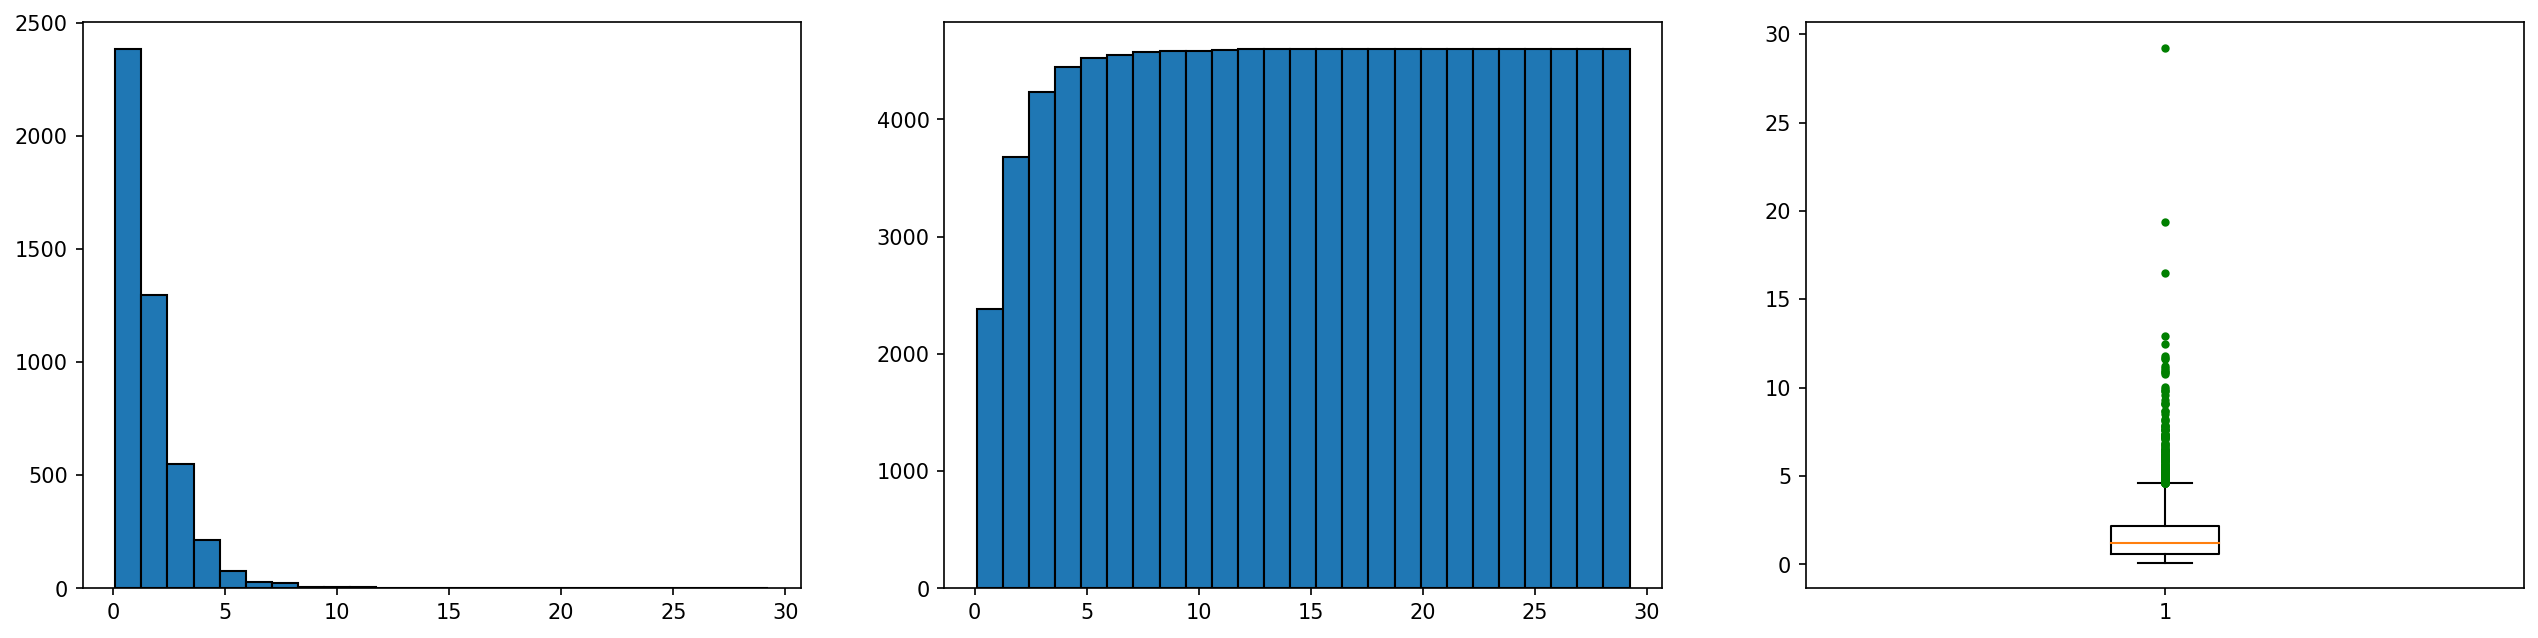

In [32]:
import matplotlib.pyplot as plt

# Select the feature of choice
feature = nm.get('section_lengths', astrocyte)

# Create empty figure
fig = plt.figure(figsize=(21, 5))

# Create histogram
ax = fig.add_subplot(131)
ax.hist(feature, bins=25, edgecolor='black')

# Create cumulative histogram
ax = fig.add_subplot(132)
ax.hist(feature, bins=25, cumulative=True, edgecolor='black')

# Create boxplot; flier points are indicated with green dots
ax = fig.add_subplot(133)
_ = ax.boxplot(feature, sym='g.')

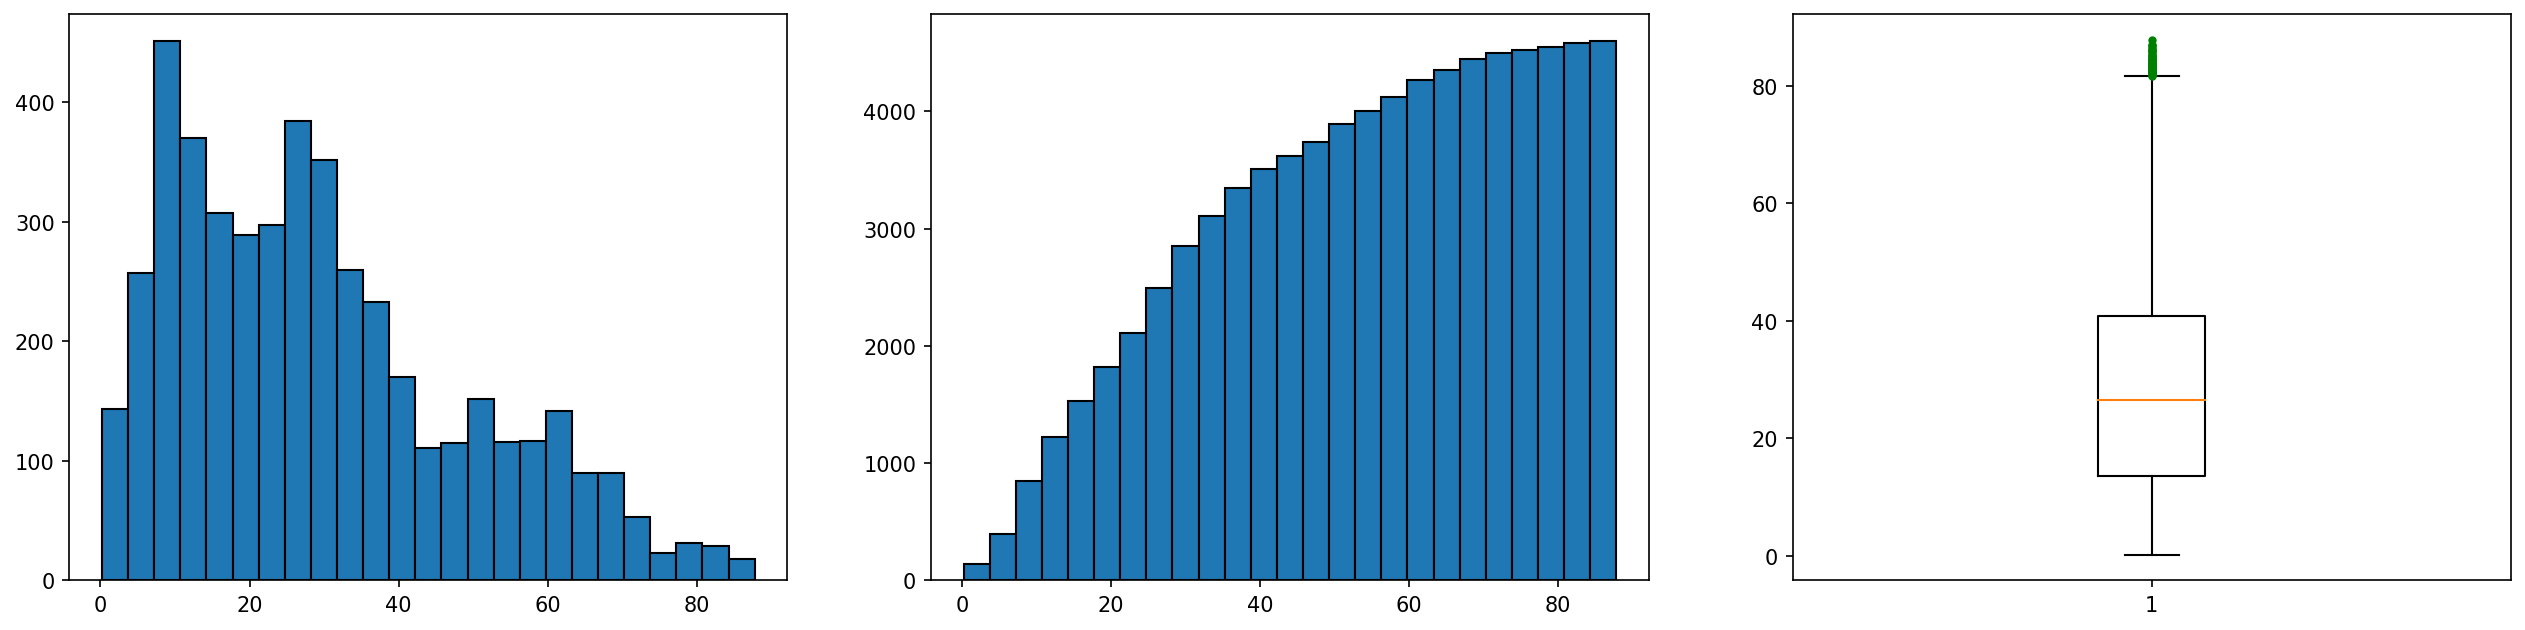

In [33]:
# Select the feature of choice
feature = nm.get('section_path_distances', astrocyte)

# Create empty figure
fig = plt.figure(figsize=(21, 5))

# Create histogram
ax = fig.add_subplot(131)
ax.hist(feature, bins=25, edgecolor='black')

# Create cumulative histogram
ax = fig.add_subplot(132)
ax.hist(feature, bins=25, cumulative=True, edgecolor='black')

# Create boxplot; flier points are indicated with green dots
ax = fig.add_subplot(133)
_ = ax.boxplot(feature, sym='g.')

## Extract and plot branching topology

(array([[4.33220741e-001, 4.59573252e-001, 4.17472620e-001, ...,
         1.63850758e-300, 3.33238323e-308, 5.38874065e-316],
        [3.93647673e-001, 4.79440288e-001, 5.09064494e-001, ...,
         1.14867745e-292, 2.94256027e-300, 5.99347356e-308],
        [3.19076858e-001, 4.32134347e-001, 5.26272007e-001, ...,
         6.31051634e-285, 2.03616494e-292, 5.22380514e-300],
        ...,
        [3.36532909e-003, 1.89146776e-003, 8.45271648e-004, ...,
         1.29373587e-001, 1.77391856e-001, 2.10729070e-001],
        [4.85122924e-003, 3.43434554e-003, 1.93313478e-003, ...,
         7.50372261e-002, 1.14331100e-001, 1.56595962e-001],
        [5.48015973e-003, 4.88659329e-003, 3.46453638e-003, ...,
         4.15681022e-002, 6.56739552e-002, 1.00151952e-001]]),
 (<Figure size 600x400 with 1 Axes>,
  <AxesSubplot:title={'center':'Persistence image'}, xlabel='End radial distance from soma', ylabel='Start radial distance from soma'>))

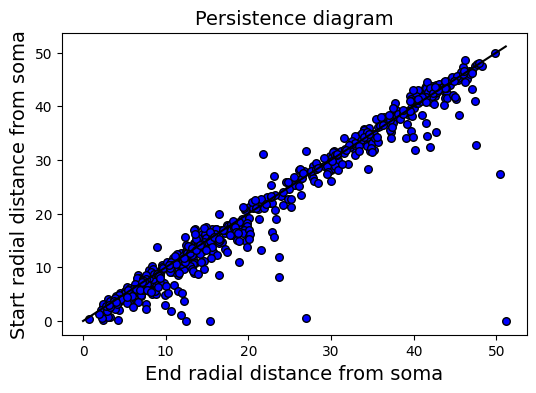

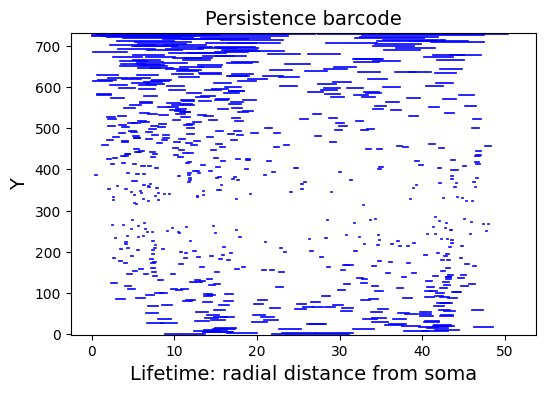

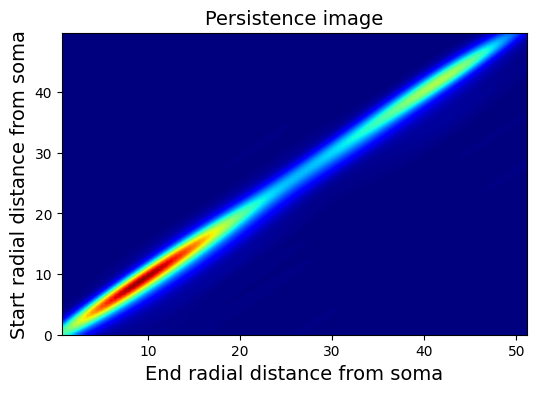

In [36]:
# Step 2: Load your morphology
neu = tmd.io.load_neuron(astrocyte_path)

# Step 5: Extract the ph diagram of a neuron's trees,
# depending on the neurite_type
ph_axon = tmd.methods.get_ph_neuron(neu, neurite_type='axon')
ph_basal = tmd.methods.get_ph_neuron(neu, neurite_type='basal')

# Step 6: Plot the extracted topological data with three different ways
from tmd.view import view, plot

# Visualize the persistence diagram
plot.diagram(ph_axon)

# Visualize the persistence barcode
plot.barcode(ph_axon)

# Visualize the persistence image
plot.persistence_image(ph_axon)